 <p style="color:cyan">Irsath Azeez<br>
 Independant Study - AI Machine Learing with KNeighborsClassifier<br>
 Prof: Steven Fulakeza
  </p>

# Detect Fraudulent Transaction by Machine Learning using Classifier models: Kneigbour Classifier, Logistic Regression

In [2]:
# importing essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, classification_report, RocCurveDisplay, auc, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix


In [3]:
file = pd.read_csv('/Users/irsathazeez/Desktop/Fraud.csv')      # reading the csv file to dataframe (file size is 151 MB)

In [4]:
file.shape      # checking the shape of the dataframe (rows, columns)

(6362620, 11)

In [5]:
! ls -lh | grep Fraud.csv | awk '{print $5}'      # checking the size of the file


471M


In [6]:
file.head()     # checking the first 5 rows of the dataframe

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
file.info()    # checking the information of the dataframe; datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
file.describe().round(2)        # checking the statistical summary of the dataframe

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6.362620e+06,6.362620e+06,6362620.00,6362620.0
mean,243.40,179861.90,833883.10,855113.67,1.100702e+06,1.224996e+06,0.00,0.0
std,142.33,603858.23,2888242.67,2924048.50,3.399180e+06,3.674129e+06,0.04,0.0
min,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
25%,156.00,13389.57,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
50%,239.00,74871.94,14208.00,0.00,1.327057e+05,2.146614e+05,0.00,0.0
75%,335.00,208721.48,107315.18,144258.41,9.430367e+05,1.111909e+06,0.00,0.0
max,743.00,92445516.64,59585040.37,49585040.37,3.560159e+08,3.561793e+08,1.00,1.0


In [9]:
file.duplicated().sum()     # checking for duplicates in the dataframe

0

In [10]:
file.isnull().sum()         # checking for missing values in the dataframe

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
file.columns # checking the columns of the dataframe

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [12]:
fraud_transaction = file[file['isFraud'] == 1]   # filtering the dataframe for fraud transactions

In [13]:
fraud_transaction.head()    # viewing the first 5 rows of the fraud transactions

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


<p> The following file1 is the one we are going to work with for training</p>

In [14]:
file1 = file.drop(axis=1, columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])   # copying the dataframe to another dataframe and dropping the few columns 

In [15]:
file1.head()    

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [16]:
file1['step'].value_counts() # checking the value counts of the 'step' column

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFraud'}>, <Axes: >, <Axes: >]],
      dtype=object)

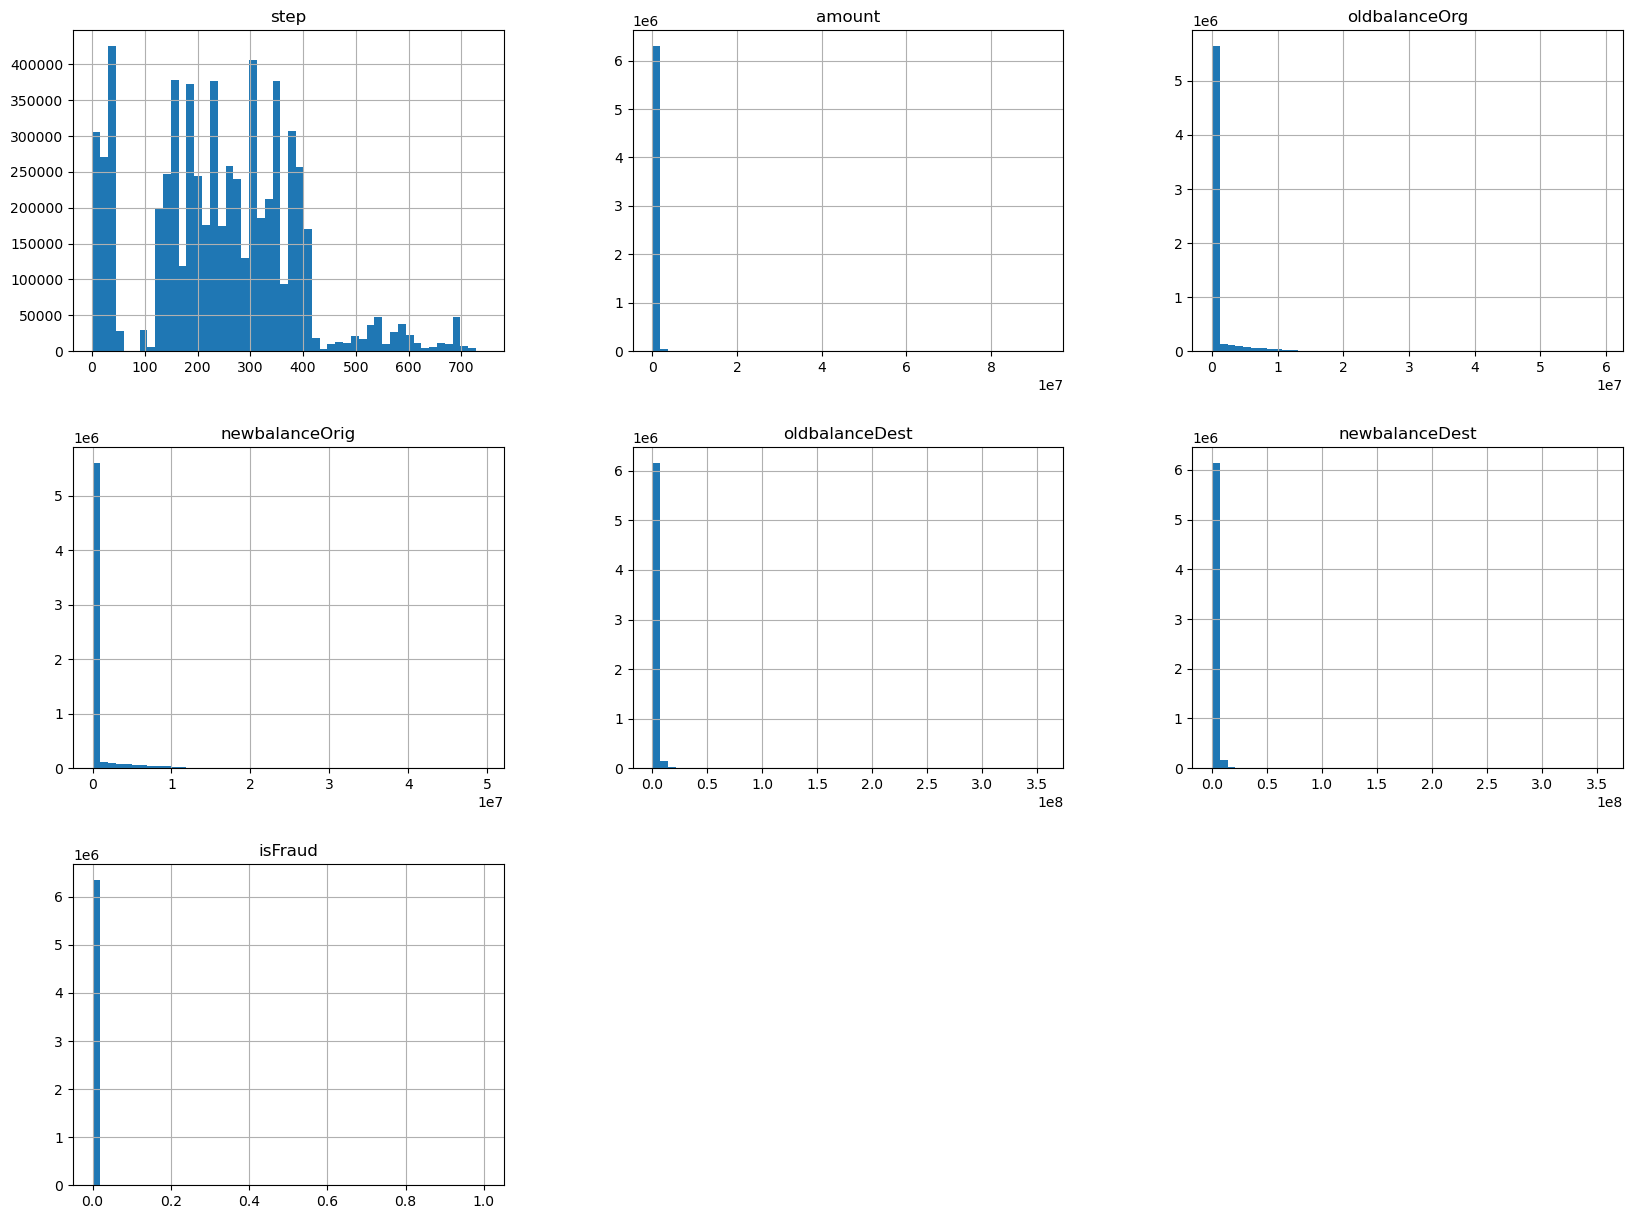

In [17]:
file1.hist(bins=50, figsize=(20, 15))   # plotting the histogram of all the variabes to see if theres is any outliers

<Axes: >

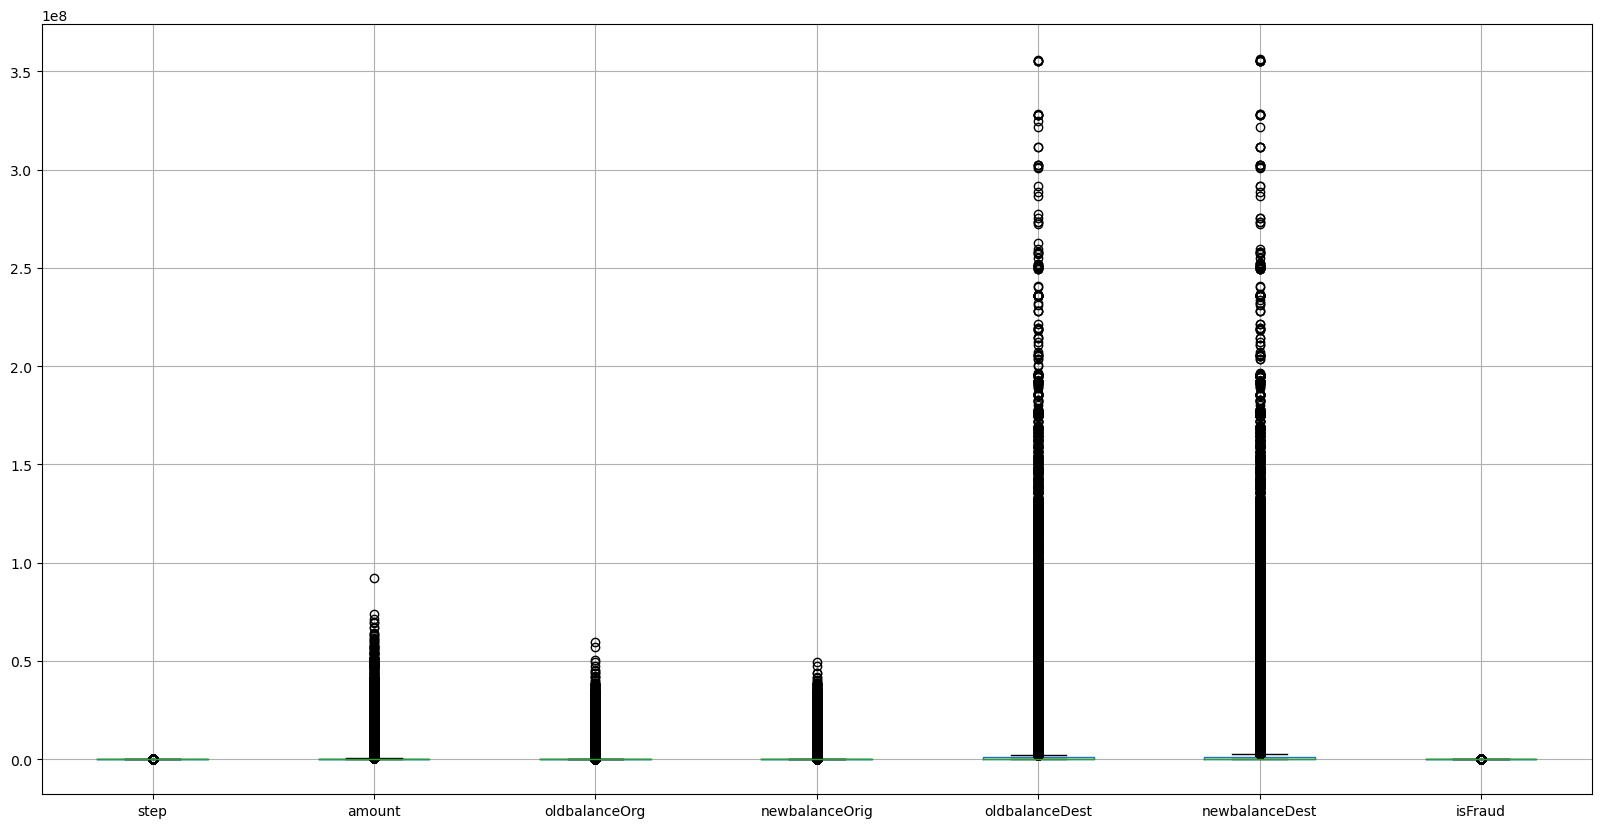

In [18]:
file1.boxplot(figsize=(20, 10))

In [19]:
file1.corr()        # checking the correlation of the variables, to see how data is related to each other

/var/folders/qs/xl2_48js3dj1vhc1js98m01h0000gn/T/ipykernel_10711/852441575.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  file1.corr()        # checking the correlation of the variables, to see how data is related to each other


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


In [20]:
file1['step'].nunique()     # checking the number of unique values in the 'step' column

743

In [21]:
file1['type'].value_counts()    # total number of transactions by type

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [22]:
dic = {'CASH_OUT': 0, 'PAYMENT': 1, 'CASH_IN': 2, 'TRANSFER': 3, 'DEBIT': 4}    # creating a dictionary for ordinal encoding

In [23]:
file1['type'] = file1['type'].apply(lambda x: dic[x])  # applying the dic encoding to the 'type' column
    

In [24]:
file1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,3,181.00,181.0,0.00,0.0,0.0,1
3,1,0,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


type_transaction file i filtered for visualization 

In [25]:
type_transaction = file1.groupby('type').sum()  # grouping the dataframe by 'type' and summing the values   

In [26]:
type_transaction.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
type,,,,,,,
0,539015395,3.944130e+11,1.029783e+11,3.909851e+10,3.351233e+12,3.784342e+12,4116
1,525778430,2.809337e+10,1.467682e+11,1.330439e+11,0.000000e+00,0.000000e+00,0
2,342111075,2.363674e+11,5.024078e+12,5.260438e+12,2.221949e+12,2.052897e+12,0
3,131445897,4.852920e+11,2.901255e+10,5.482651e+09,1.368300e+12,1.894261e+12,4097
4,10293386,2.271992e+08,2.844196e+09,2.699778e+09,6.186360e+10,6.268676e+10,0


In [27]:
type_transaction_string = type_transaction.copy()

In [28]:
list1 = type_transaction_string.columns[1:-2]
list1

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest'], dtype='object')

In [29]:
for col in list1:           # formatting the numbers to human readable format with separated by commas and 2 decimal places
    type_transaction_string[col] = type_transaction_string[col].apply(lambda x: "{:,.2f}".format(x))

In [30]:
def assign_key(val):
    for key, value in dic.items():
        if value == val:
            return key
    


In [31]:
type_transaction_string.reset_index(inplace=True)
type_transaction_string.head()

,type,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0,539015395,"394,412,995,224.49","102,978,263,227.81","39,098,506,249.34","3,351,233,273,577.65",3.784342e+12,4116
1,1,525778430,"28,093,371,138.37","146,768,163,438.80","133,043,913,105.10",0.00,0.000000e+00,0
2,2,342111075,"236,367,391,912.46","5,024,078,139,747.24","5,260,438,481,752.39","2,221,949,365,238.93",2.052897e+12,0
3,3,131445897,"485,291,987,263.17","29,012,552,760.76","5,482,651,300.55","1,368,300,197,339.45",1.894261e+12,4097
4,4,10293386,"227,199,221.28","2,844,196,471.80","2,699,777,564.12","61,863,601,275.22",6.268676e+10,0


In [32]:
type_transaction_string['type'] = type_transaction_string['type'].apply(lambda x: assign_key(x))        # applying the Dic key to the 'type' column

In [33]:
dic

{'CASH_OUT': 0, 'PAYMENT': 1, 'CASH_IN': 2, 'TRANSFER': 3, 'DEBIT': 4}

In [34]:
type_transaction_string    # the values are in string format, to show the values in thousands

,type,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,CASH_OUT,539015395,"394,412,995,224.49","102,978,263,227.81","39,098,506,249.34","3,351,233,273,577.65",3.784342e+12,4116
1,PAYMENT,525778430,"28,093,371,138.37","146,768,163,438.80","133,043,913,105.10",0.00,0.000000e+00,0
2,CASH_IN,342111075,"236,367,391,912.46","5,024,078,139,747.24","5,260,438,481,752.39","2,221,949,365,238.93",2.052897e+12,0
3,TRANSFER,131445897,"485,291,987,263.17","29,012,552,760.76","5,482,651,300.55","1,368,300,197,339.45",1.894261e+12,4097
4,DEBIT,10293386,"227,199,221.28","2,844,196,471.80","2,699,777,564.12","61,863,601,275.22",6.268676e+10,0


In [35]:
type_transaction.reset_index(inplace=True)
type_transaction['type'] = type_transaction_string['type']

In [36]:
x = type_transaction[type_transaction['type'] == 'DEBIT']['amount']         # calculating the average amount of DEBIT transactions just to compare the following image
y = type_transaction['amount'].sum()
z = x/y
z

4    0.000199
Name: amount, dtype: float64

# Visualization

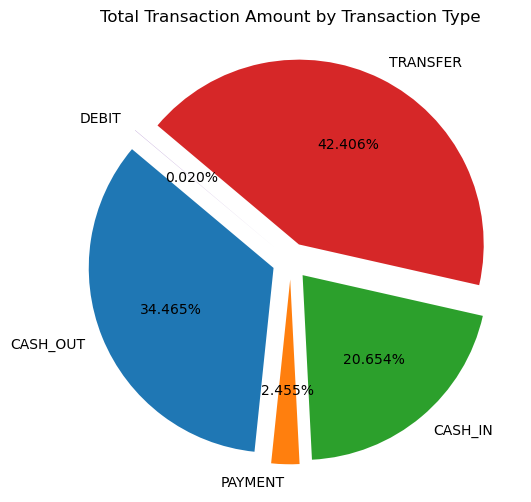

In [37]:
plt.figure(figsize=(10, 6))
plt.title('Total Transaction Amount by Transaction Type')
plt.pie(type_transaction['amount'], labels=type_transaction['type'], autopct='%1.3f%%', startangle=140, explode=(0.1, 0.1, 0.1, 0.1, 0.1))
plt.show()

In [38]:
fraud_total_amount_by_type = fraud_transaction.groupby('type')['amount'].sum()

In [39]:
fraud_total_amount_by_type = fraud_total_amount_by_type.to_frame()

In [40]:
fraud_total_amount_by_type.head()

,amount
type,
CASH_OUT,5.989202e+09
TRANSFER,6.067213e+09


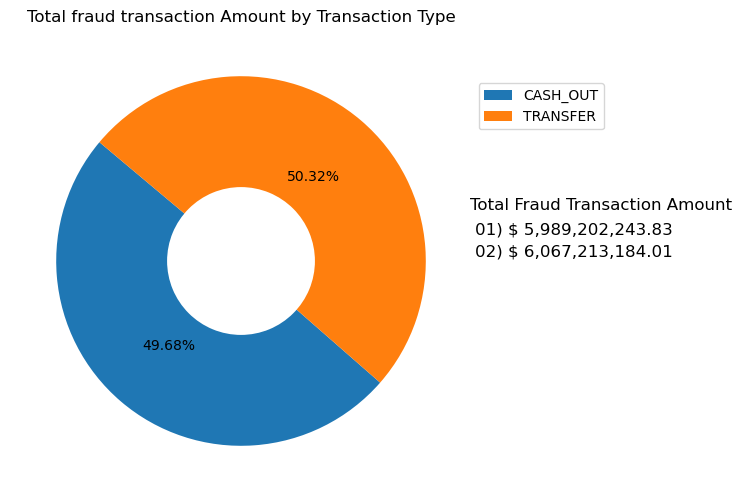

In [41]:
plt.figure(figsize=(10, 6))
plt.title("Total fraud transaction Amount by Transaction Type")
plt.pie(fraud_total_amount_by_type['amount'], autopct='%0.2f%%', startangle=140)
plt.pie([1], colors='w', radius=0.4)
plt.legend(labels=fraud_total_amount_by_type.index, loc='upper right', bbox_to_anchor=(0.8, -0.1, 0.5, 1))
plt.text(1.95, 0.3, 'Total Fraud Transaction Amount', ha='center', va='center', fontsize=12, color='black')
plt.text(1.8, 0.17, '01) '+ "$ {:,.2f}".format(fraud_total_amount_by_type.loc['CASH_OUT']['amount']), ha='center', va='center', fontsize=12, color='black')
plt.text(1.8, 0.05, '02) '+ "$ {:,.2f}".format(fraud_total_amount_by_type.loc['TRANSFER']['amount']), ha='center', va='center', fontsize=12, color='black')
# plt.text(2, 2, 'Total Fraud Transaction Amount', ha='center', va='center', fontsize=12, color='black')
plt.show()

# Machine Learning

In [42]:
colNames = list(file1.columns)[0:-1]    # taking only non-classifier columns
train_set, valid_set, t_y, v_y = train_test_split(file1[colNames], file1['isFraud'], test_size=0.3)   # splitting the data into training and validation sets from dataset

In [43]:
scale = StandardScaler()    # scaling the data will improve the accuracy
scale.fit(train_set)
train_stand = scale.fit_transform(train_set)    # scaled data
valid_stand = scale.fit_transform(valid_set)

In [44]:
# converting the scaled data to dataframe
train_stand = pd.DataFrame(train_stand, columns=colNames)   
valid_stand = pd.DataFrame(valid_stand, columns=colNames)

In [45]:
print('shape of training data:',train_stand.shape)
print('shape of validation data:',valid_stand.shape)

shape of training data: (4453834, 7)
shape of validation data: (1908786, 7)


In [46]:
t_y.value_counts()  # checking how many o and 1 in the training set

0    4448141
1       5693
Name: isFraud, dtype: int64

In [47]:
v_y.value_counts() # checking how many 0 and 1 in the validation set

0    1906266
1       2520
Name: isFraud, dtype: int64

# Model Selection

01. Logistic Regression model 

In [48]:
model = LogisticRegression(solver='newton-cg', max_iter=500)
model.fit(train_stand, t_y)
prediction = model.predict(valid_stand)
actual = v_y
accuracy = accuracy_score(actual, prediction)
# x = cross_val_score(model, train_stand, t_y, cv=5 )

In [49]:
print("\nAccuracy score: ", accuracy_score(actual, prediction))
print("Precision score: ", precision_score(actual, prediction))
print("recall score: ", recall_score(actual, prediction))


Accuracy score:  0.9991890133309863
Precision score:  0.8957654723127035
recall score:  0.4365079365079365


In [50]:
print(confusion_matrix(actual, prediction))

[[1906138     128]
 [   1420    1100]]


Plotting ROC curve to examine the model performance

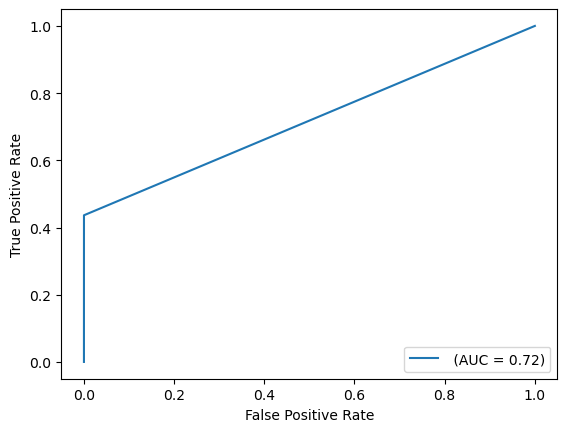

In [51]:
fpr, tpr, thresholds = roc_curve(actual, prediction)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='')
display.plot()

02. kNeighbors Classifier Model

In [52]:
model2 = KNeighborsClassifier(algorithm='auto')     # using KNN classifier
model2.fit(train_stand, t_y)        # fitting the model to train the model with our training data
prediction2 = model2.predict(valid_stand)   # predicting the validation data using our trained model
actual2 = v_y


In [53]:
accuracy = accuracy_score(actual2, prediction2)     # calculating the accuracy of the model prediction
print(accuracy)

0.9994892041328887


Confusion Matrix

In [54]:
matrix = confusion_matrix(actual2, prediction2)     

In [55]:
print("      {}              {}      (predicted class)".format(0,1))
print("-"*24)
for i in range(2):
    print(i,'|', end='  ')
    for j in range(2):
        print("{:<10}".format(matrix[i][j]), end='      ')
    print()

print()
print('^ (Actual Class)')

      0              1      (predicted class)
------------------------
0 |  1906218         48              
1 |  927             1593            

^ (Actual Class)


Checking the precision and recall scores of the model performance. (The formula is as follows)

<img src="/Users/irsathazeez/Desktop/pr.png" alt="Formula for precision and recall" width='300'/>

<img src="https://www.researchgate.net/publication/363509386/figure/fig1/AS:11431281084243585@1663082702948/Typical-structure-of-confusion-matrix.ppm" alt="Typical structure of confusion matrix." width='300'/>

In [56]:
print("Precision score: ", precision_score(actual2, prediction2))
print("recall score: ", recall_score(actual2, prediction2))

Precision score:  0.9707495429616088
recall score:  0.6321428571428571


plotting ROC curve

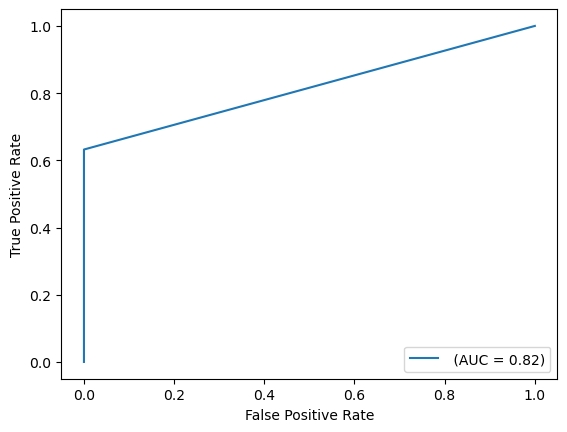

In [57]:
fpr, tpr, thresholds = roc_curve(actual2, prediction2)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='')
display.plot()

# Conclusion:
<p style='font-size:25px;'>

From the dataset Fradulant data acquired from Kaggle website, I created a machine learning model that predict whether it is Fraud or Not-Fraud based on certain criteria. I used twe pre-defined models such as Logistic Regression model and KNeigbour model to train the data set.
On my research, I able produce the following result on both model, <br>

Model 1: Logistic Regression <br>
<ul>
  <li>Model Accuracy: 0.9991947761561537</li>
  <li>Precision Score: 0.8933884297520661</li>
  <li>Recall Score: 0.43431096826034554</li>
</ul>

Model 2: KNeigbour Classifier Model <br>
<ul>
  <li>Model Accuracy: 0.9994855368805093</li>
  <li>Precision Score: 0.95364238410596031</li>
  <li>Recall Score: 0.6364001607071113</li>
</ul>
 </p>

 The KNeigbour Classifier perform well compared to Logistic Regression due to the algorithm chose by KNeighbour model.

<div style="font-style:20px; text-align:center;color:red">
Data set source: kaggle <br>
Created by: Irsath Azeez
</div>

# Extra Models that perform classifier task

1 . using LinearSVC classifier

In [58]:
model3 = LinearSVC(max_iter=10000)    # using LinearSVC classifier
model3.fit(train_stand, t_y)      
prediction3 = model3.predict(valid_stand)  
actual3 = v_y
accuracy3 = accuracy_score(actual3, prediction3)   
precision3= precision_score(actual3, prediction3)
recall3 = recall_score(actual3, prediction3)


/Users/irsathazeez/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [59]:
print("\nAccuracy score: ", accuracy3)
print("Precision score: ", precision3)
print("recall score: ", recall3)


Accuracy score:  0.9991712009622871
Precision score:  0.9544573643410853
recall score:  0.39087301587301587


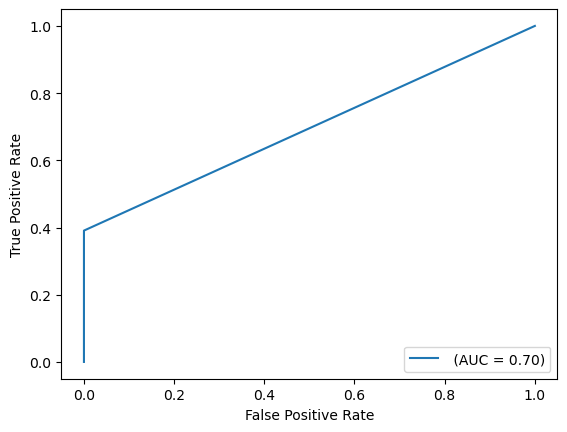

In [60]:
fpr, tpr, thresholds = roc_curve(actual3, prediction3)
roc_auc3 = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc3, estimator_name='')
display.plot()

2. XG boost models

In [61]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
xgb_model.fit(train_stand, t_y)
xgb_prediction = xgb_model.predict(valid_stand)
actual4 = v_y
prediction4 = xgb_prediction
precision4 = precision_score(actual4, prediction4)
accuracy4 = accuracy_score(actual4, prediction4)
recall4 = recall_score(actual4, prediction4)

In [62]:
print("\nAccuracy score: ", accuracy4)
print("Precision score: ", precision4)
print("recall score: ", recall4)


Accuracy score:  0.9992120646316559
Precision score:  0.9801512287334594
recall score:  0.4115079365079365


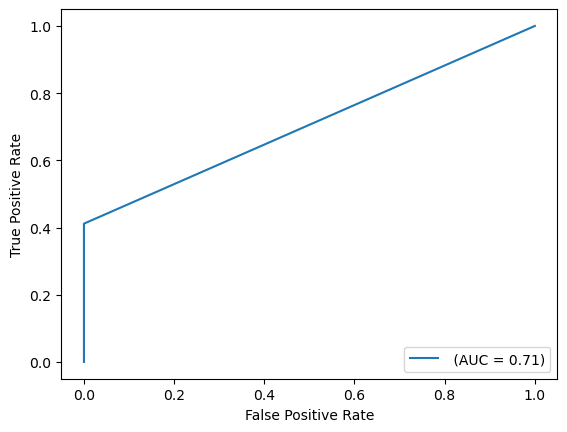

In [63]:
fpr, tpr, thresholds = roc_curve(actual4, prediction4)
roc_auc4 = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc4, estimator_name='')
display.plot()